# MACHINE LEARNING LAB FAT 
#SLOT L9+L10
#18BCE0819
#RAGHAV DEWAN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [11]:
#loading the dataset using numpy and pandas libraries
import numpy as np
import pandas as pd

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"  ## USING THE LINK OF THE UCI REPOSITORY I LOAD THE CAR EVALUATION DATASET
Names  = ['Class values','buying','maint','doors','persons','lug_boot','safety'] ## USING THESE COLUMN NAMES IN THE DATASET 
car = pd.read_csv(URL,header=None) #reading the dataset as a csv file
car.columns = Names
car #printing the dataset loaded

,Class values,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
# importing the libraries needed to develop the neural networks

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math


# Here I define the function for root mean sqaured function 
# I chose root mean square as it is more accurate in case of Neural networks

In [13]:
#Here I define the function for root mean sqaured function 
# I chose root mean square as it is more accurate in case of Neural networks
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [14]:
df.head()

,Class values,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
pip install torch

     |████████████████████████████████| 119.6 MB 222 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Using get dummies function the values change in to binary values, so the neural network can read and not bias over a specific value of an attribute.

In [23]:
# Using get dummies function the values change in to binary values, so the neural network can read and not bias over a specific value of an attribute.
df = pd.get_dummies(df, columns=Names)
print(df.shape)
df.head(10)

(1728, 25)


,Class values_high,Class values_low,Class values_med,Class values_vhigh,buying_high,buying_low,buying_med,buying_vhigh,maint_2,maint_3,...,persons_big,persons_med,persons_small,lug_boot_high,lug_boot_low,lug_boot_med,safety_acc,safety_good,safety_unacc,safety_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
8,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [26]:
X = df.iloc[:, 0:21].values # identifying the train values
y = df.iloc[:, 21:].values # identifying the test vaalues
## Normalizing data - Scaling the data in the range between 0 to 1
X = preprocessing.scale(X)
from sklearn.model_selection import train_test_split # taining, testing and splitting the dataset using the target variable
feature_train, feature_test, labels_train, labels_test = train_test_split(X, y, random_state = 42)
# Here I used random state as 42 
print ("Train:%d +  Test:%d = Total:%d"  % (len(feature_train),len(feature_test),len(feature_train)+len(feature_test)))

Train:1296 +  Test:432 = Total:1728


In [27]:
X = df.iloc[:, 0:21].values
y = df.iloc[:, 21:].values
## Normalizing data - Scaling the data in the range between 0 to 1
X = preprocessing.scale(X)
from sklearn.model_selection import train_test_split # taining, testing and splitting the dataset using the target variable
feature_train, feature_test, labels_train, labels_test = train_test_split(X, y, random_state = 35)
## Here I used random state as 35 
print ("Train:%d +  Test:%d = Total:%d"  % (len(feature_train),len(feature_test),len(feature_train)+len(feature_test)))
#The results are same using the different random state values 

Train:1296 +  Test:432 = Total:1728


# features and labels classified

In [28]:
#features and labels classified
feature_train_v = Variable(torch.FloatTensor(feature_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(labels_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(feature_test), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(labels_test), requires_grad = False)

class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.h_layer = nn.Linear(21, 4) #21 input layers and 4 output layers
        self.s_layer = nn.Softmax()
    def forward(self,x):
        y = self.h_layer(x)
        p = self.s_layer(y)
        return p
#declaring the classifier to an object
model = LinearClassifier()   
#calculates the loss
loss_fn = nn.BCELoss()       
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

In [29]:
all_losses = []
for num in range(5000): 
    pred = model(feature_train_v) #predict
    loss = loss_fn(pred, labels_train_v) #calculate loss
    all_losses.append(loss.data)
    optim.zero_grad() #zero gradients to not accumulate
    loss.backward() #update weights based on loss
    optim.step()

<ipython-input-28-3737b4f98a2f>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p = self.s_layer(y)


# plotting the all the losses

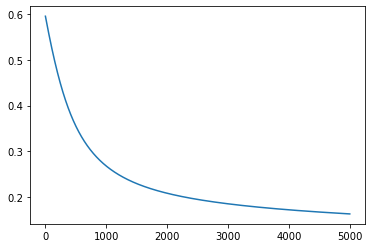

tensor([0.6064, 0.0773, 0.2768, 0.0395], grad_fn=<SelectBackward>)
tensor([1., 0., 0., 0.])
0.1630149483680725


In [30]:
#plotting the all the losses
all_losses = np.array(all_losses, dtype = np.float)
all_losses
plt.plot(all_losses)
plt.show()
# printing prediction, labels and all losses values
print(pred[3])
print(labels_train_v[3])
print(all_losses[-1])

# Accuracy Score

In [31]:
# Accuracy Score
predicted_values = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))

    
    score = 0
for num in range(len(predicted_values)):
    if np.argmax(labels_test[num]) == np.argmax(predicted_values[num].data.numpy()):
        score = score + 1
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 83.79629629629629


<ipython-input-28-3737b4f98a2f>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p = self.s_layer(y)


# Testing Accuracy Score is 83.79629629629629

#18BCE0819
#RAGHAV DEWAN